## Part 1: CMS Data Exercise


### TABLE CONTENTS  
1. Introduction
2. Define the problems
3. Objective
4. Establishing Key Performance Indicators
5. Data Preprocessing
6. Feature Engineering
7. Findings and Visualization
8. Recommendations
   

## 1. Introduction

**Company**: Clipboard Health - Connecting Healthcare Facilities with  Professional staffing. (contractor)

**Background**:Nursing homes are staffed by both employees and contractors. Employees work for the nursing home full time, whereas contractors work for the nursing home on a temporary basis. Most nursing homes are staffed using some combination of full time employees and contractors, but the proportions within each nursing home can vary substantially. All workers from Clipboard Health (and our competitors) are classified as contractors.

**Assignment**: Use the Payroll Based Journal (PBJ) data and any other CMS data that you see fit to make a few recommendations to the Clipboard Health sales leadership team. Each recommendation should include some writing around how you analyzed the data, what you uncovered, and the specifics of what you’d recommend the sales team do based on your findings.

**Dataset**:  
The Primary dataset for this project is the Payroll Based Journal (PBJ) [Daily Nurse Staffing report](https://data.cms.gov/quality-of-care/payroll-based-journal-daily-nurse-staffing/data),published through the second quarter of 2024 by the Centers for Medicare and Medicaid Services(CMC), It contains daily stuffing data for all registered nursing homes in the U.S. This dataset is supplemented by the [Provider Information](https://data.cms.gov/provider-data/search?theme=Nursing%20homes%20including%20rehab%20services) dataset, also available under the nursing home data section on the CMS'website.

## 2.Define the problems
 
 - What percentage of contractor usage in nursing home?
 - Which facility have staffing shortage or high turnover?
 - What types of staff (RNs, LPNs, CNAs) are most in demand across nursing homes?
 - Which nursing homes struggle to meet CMS staffing requirements?

## 3.Objective

Improve sales performance by identifying and addressing nursing home staffing gaps, high turnover rates, and operational inefficiencies to increase client satisfaction and drive revenue growth.



## 4. Establishing Key Performance Indicators
The Payroll Based Journal (PBJ) Daily Nurse Staffing dataset contains 1,325,323 entries across 33 columns, while the Provider Information dataset includes 14,782 entries with 103 columns. To ensure a focused analysis aligned with the project's objectives, i will narrow the scope of these datasets by retaining only the most relevant and measurable metrics.

**(PBJ) dataset:**  
`PROVNUM`:  Medicare provider number  
`PROVNAME`: Provider name  
`STATE`: Alabama(AL)  
`CY_Qtr`: 2024 Q2  
`MDScensus`: Resident Census from MDS(Minimum Data Set)  
`Hrs_RN`:  Total Hours for Registered Nurse  
`Hrs_RN_ctr`:  Contract Hours for Registered Nurse  
`Hrs_LPN`:  Total Hours for Licensed Practical Nurse  
`Hrs_LPN_ctr`:  Contract Hours for Licensed Practical Nurse  
`Hrs_CNA`:  Total Hours for Certified Nursing Assistant  
`Hrs_CNA_ctr`: Contract Hours for Certified Nursing Assistant

**Provider Information Dataset**  
`PROVNUM`: Medicare provider number ( Serve as the key to join the PBJ dataset with the Provider Information dataset)  
`Number of Certified Beds`  
`Average Number of Residents per Day`  
`Staffing Rating`:  Staffing data used in the Five-Star Rating System  
`Reported Total Nurse Staffing Hours per Resident per Day`  
`Total nursing staff turnover`  
`Registered Nurse turnover`: (RN)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors  
import matplotlib.cm as cm  
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns',999)

In [2]:
#Loding data
pbj_df = pd.read_csv('/Users/apple/Desktop/Clipboard_Health/PBJ_Daily_Nurse_Staffing_Q2_2024.csv',encoding='cp1252',low_memory=False)
provider_df = pd.read_csv('/Users/apple/Desktop/Clipboard_Health/NH_ProviderInfo_Feb2025.csv',encoding='cp1252',low_memory=False)

## 5. Data Preprocessing

In [3]:
provider_df.columns = provider_df.columns.str.strip()
pbj_df.rename({"ï»¿PROVNUM":"PROVNUM"},axis=1,inplace = True)
pbj_df.head()

,PROVNUM,PROVNAME,CITY,STATE,COUNTY_NAME,COUNTY_FIPS,CY_Qtr,WorkDate,MDScensus,Hrs_RNDON,Hrs_RNDON_emp,Hrs_RNDON_ctr,Hrs_RNadmin,Hrs_RNadmin_emp,Hrs_RNadmin_ctr,Hrs_RN,Hrs_RN_emp,Hrs_RN_ctr,Hrs_LPNadmin,Hrs_LPNadmin_emp,Hrs_LPNadmin_ctr,Hrs_LPN,Hrs_LPN_emp,Hrs_LPN_ctr,Hrs_CNA,Hrs_CNA_emp,Hrs_CNA_ctr,Hrs_NAtrn,Hrs_NAtrn_emp,Hrs_NAtrn_ctr,Hrs_MedAide,Hrs_MedAide_emp,Hrs_MedAide_ctr
0,015009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q2,20240401,51,10.77,10.77,0.0,10.40,10.40,0.0,55.70,55.70,0.0,0.0,0.0,0.0,25.50,25.50,0.0,160.08,160.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,015009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q2,20240402,52,8.43,8.43,0.0,18.25,18.25,0.0,63.28,63.28,0.0,0.0,0.0,0.0,15.22,15.22,0.0,135.95,135.95,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,015009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q2,20240403,53,11.13,11.13,0.0,12.08,12.08,0.0,76.29,76.29,0.0,0.0,0.0,0.0,5.46,5.46,0.0,150.31,150.31,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,015009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q2,20240404,52,12.27,12.27,0.0,17.53,17.53,0.0,54.13,54.13,0.0,0.0,0.0,0.0,20.18,20.18,0.0,133.01,133.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,015009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q2,20240405,52,4.95,4.95,0.0,17.42,17.42,0.0,53.63,53.63,0.0,0.0,0.0,0.0,27.85,27.85,0.0,137.92,137.92,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
provider_df.columns = provider_df.columns.str.strip() 
provider_df.rename(columns={"CMS Certification Number (CCN)": "PROVNUM"}, inplace=True)
provider_df.head()

,PROVNUM,Provider Name,Provider Address,City/Town,State,ZIP Code,Telephone Number,Provider SSA County Code,County/Parish,Ownership Type,Number of Certified Beds,Average Number of Residents per Day,Average Number of Residents per Day Footnote,Provider Type,Provider Resides in Hospital,Legal Business Name,Date First Approved to Provide Medicare and Medicaid Services,Affiliated Entity Name,Affiliated Entity ID,Continuing Care Retirement Community,Special Focus Status,Abuse Icon,Most Recent Health Inspection More Than 2 Years Ago,Provider Changed Ownership in Last 12 Months,With a Resident and Family Council,Automatic Sprinkler Systems in All Required Areas,Overall Rating,Overall Rating Footnote,Health Inspection Rating,Health Inspection Rating Footnote,QM Rating,QM Rating Footnote,Long-Stay QM Rating,Long-Stay QM Rating Footnote,Short-Stay QM Rating,Short-Stay QM Rating Footnote,Staffing Rating,Staffing Rating Footnote,Reported Staffing Footnote,Physical Therapist Staffing Footnote,Reported Nurse Aide Staffing Hours per Resident per Day,Reported LPN Staffing Hours per Resident per Day,Reported RN Staffing Hours per Resident per Day,Reported Licensed Staffing Hours per Resident per Day,Reported Total Nurse Staffing Hours per Resident per Day,Total number of nurse staff hours per resident per day on the weekend,Registered Nurse hours per resident per day on the weekend,Reported Physical Therapist Staffing Hours per Resident Per Day,Total nursing staff turnover,Total nursing staff turnover footnote,Registered Nurse turnover,Registered Nurse turnover footnote,Number of administrators who have left the nursing home,Administrator turnover footnote,Nursing Case-Mix Index,Nursing Case-Mix Index Ratio,Case-Mix Nurse Aide Staffing Hours per Resident per Day,Case-Mix LPN Staffing Hours per Resident per Day,Case-Mix RN Staffing Hours per Resident per Day,Case-Mix Total Nurse Staffing Hours per Resident per Day,Case-Mix Weekend Total Nurse Staffing Hours per Resident per Day,Adjusted Nurse Aide Staffing Hours per Resident per Day,Adjusted LPN Staffing Hours per Resident per Day,Adjusted RN Staffing Hours per Resident per Day,Adjusted Total Nurse Staffing Hours per Resident per Day,Adjusted Weekend Total Nurse Staffing Hours per Resident per Day,Rating Cycle 1 Standard Survey Health Date,Rating Cycle 1 Total Number of Health Deficiencies,Rating Cycle 1 Number of Standard Health Deficiencies,Rating Cycle 1 Number of Complaint Health Deficiencies,Rating Cycle 1 Health Deficiency Score,Rating Cycle 1 Number of Health Revisits,Rating Cycle 1 Health Revisit Score,Rating Cycle 1 Total Health Score,Rating Cycle 2 Standard Health Survey Date,Rating Cycle 2 Total Number of Health Deficiencies,Rating Cycle 2 Number of Standard Health Deficiencies,Rating Cycle 2 Number of Complaint Health Deficiencies,Rating Cycle 2 Health Deficiency Score,Rating Cycle 2 Number of Health Revisits,Rating Cycle 2 Health Revisit Score,Rating Cycle 2 Total Health Score,Rating Cycle 3 Standard Health Survey Date,Rating Cycle 3 Total Number of Health Deficiencies,Rating Cycle 3 Number of Standard Health Deficiencies,Rating Cycle 3 Number of Complaint Health Deficiencies,Rating Cycle 3 Health Deficiency Score,Rating Cycle 3 Number of Health Revisits,Rating Cycle 3 Health Revisit Score,Rating Cycle 3 Total Health Score,Total Weighted Health Survey Score,Number of Facility Reported Incidents,Number of Substantiated Complaints,Number of Citations from Infection Control Inspections,Number of Fines,Total Amount of Fines in Dollars,Number of Payment Denials,Total Number of Penalties,Location,Latitude,Longitude,Geocoding Footnote,Processing Date
0,015009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,290,Franklin,For profit - Corporation,57,53.5,NaN,Medicare and Medicaid,N,"BURNS NURSING HOME, INC.",1969-09-01,NaN,NaN,N,NaN,N,N,N,Resident,Yes,2.0,NaN,2.0,NaN,4.0,NaN,4.0,NaN,3.0,NaN,4.0,NaN,NaN,NaN,2.54494,0.45445,1.08468,1.53913,4.08407,3.30202,0.5750

In [5]:
#Select key variable from each dataset. 
#(PBJ) Nurse Staffing Dataset
key_variables_PBJ = [ 'PROVNUM', 'PROVNAME', 'STATE','CY_Qtr', 'MDScensus',  'Hrs_RN',
                     'Hrs_RN_ctr', 'Hrs_LPN', 'Hrs_LPN_ctr', 'Hrs_CNA', 'Hrs_CNA_ctr',]
pbj_df = pbj_df[key_variables_PBJ]

In [6]:
#Provider Information dataset
key_variables_provider = [ 'PROVNUM', 'Number of Certified Beds', 'Average Number of Residents per Day',
                         'Staffing Rating','Reported Total Nurse Staffing Hours per Resident per Day','Total nursing staff turnover',
                         'Registered Nurse turnover'
                        ]
provider_df = provider_df[key_variables_provider]

**Merge two csv files**

In [7]:
merged_df = pd.merge(pbj_df,provider_df, on = "PROVNUM",how="inner")
merged_df.to_csv("/Users/apple/Desktop/Clipboard_Health/Merged_Nurse_Staffing_Provider_Info.csv", index=False)
merged_df.head()

,PROVNUM,PROVNAME,STATE,CY_Qtr,MDScensus,Hrs_RN,Hrs_RN_ctr,Hrs_LPN,Hrs_LPN_ctr,Hrs_CNA,Hrs_CNA_ctr,Number of Certified Beds,Average Number of Residents per Day,Staffing Rating,Reported Total Nurse Staffing Hours per Resident per Day,Total nursing staff turnover,Registered Nurse turnover
0,015009,"BURNS NURSING HOME, INC.",AL,2024Q2,51,55.70,0.0,25.50,0.0,160.08,0.0,57,53.5,4.0,4.08407,36.5,14.3
1,015009,"BURNS NURSING HOME, INC.",AL,2024Q2,52,63.28,0.0,15.22,0.0,135.95,0.0,57,53.5,4.0,4.08407,36.5,14.3
2,015009,"BURNS NURSING HOME, INC.",AL,2024Q2,53,76.29,0.0,5.46,0.0,150.31,0.0,57,53.5,4.0,4.08407,36.5,14.3
3,015009,"BURNS NURSING HOME, INC.",AL,2024Q2,52,54.13,0.0,20.18,0.0,133.01,0.0,57,53.5,4.0,4.08407,36.5,14.3
4,015009,"BURNS NURSING HOME, INC.",AL,2024Q2,52,53.63,0.0,27.85,0.0,137.92,0.0,57,53.5,4.0,4.08407,36.5,14.3


In [8]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1321502 entries, 0 to 1321501
Data columns (total 17 columns):
 #   Column                                                    Non-Null Count    Dtype  
---  ------                                                    --------------    -----  
 0   PROVNUM                                                   1321502 non-null  object 
 1   PROVNAME                                                  1321502 non-null  object 
 2   STATE                                                     1321502 non-null  object 
 3   CY_Qtr                                                    1321502 non-null  object 
 4   MDScensus                                                 1321502 non-null  int64  
 5   Hrs_RN                                                    1321502 non-null  float64
 6   Hrs_RN_ctr                                                1321502 non-null  float64
 7   Hrs_LPN                                                   1321502 non-null  float

In [9]:
pd.options.display.float_format = "{:.2f}".format
merged_df.describe().T

,count,mean,std,min,25%,50%,75%,max
MDScensus,1321502.00,83.53,49.01,0.00,51.00,76.00,104.00,742.00
Hrs_RN,1321502.00,34.85,35.35,0.00,13.25,25.75,45.25,915.98
Hrs_RN_ctr,1321502.00,2.81,10.51,0.00,0.00,0.00,0.00,512.39
Hrs_LPN,1321502.00,66.28,49.82,0.00,32.75,56.98,88.52,13946.25
Hrs_LPN_ctr,1321502.00,6.14,19.66,0.00,0.00,0.00,3.88,13801.50
Hrs_CNA,1321502.00,174.04,115.16,0.00,98.83,150.84,220.20,1758.10
Hrs_CNA_ctr,1321502.00,12.18,31.87,0.00,0.00,0.00,8.00,661.42
Number of Certified Beds,1321502.00,107.25,58.95,4.00,66.00,100.00,128.00,843.00
Average Number of Residents per Day,1319955.00,83.96,48.99,2.10,51.10,76.50,105.40,727.00
Staffing Rating,1309308.00,2.76,1.26,1.00,2.00,3.00,4.00,5.00


In [10]:
merged_df.isnull().sum()

PROVNUM                                                          0
PROVNAME                                                         0
STATE                                                            0
CY_Qtr                                                           0
MDScensus                                                        0
Hrs_RN                                                           0
Hrs_RN_ctr                                                       0
Hrs_LPN                                                          0
Hrs_LPN_ctr                                                      0
Hrs_CNA                                                          0
Hrs_CNA_ctr                                                      0
Number of Certified Beds                                         0
Average Number of Residents per Day                           1547
Staffing Rating                                              12194
Reported Total Nurse Staffing Hours per Resident per Day     2

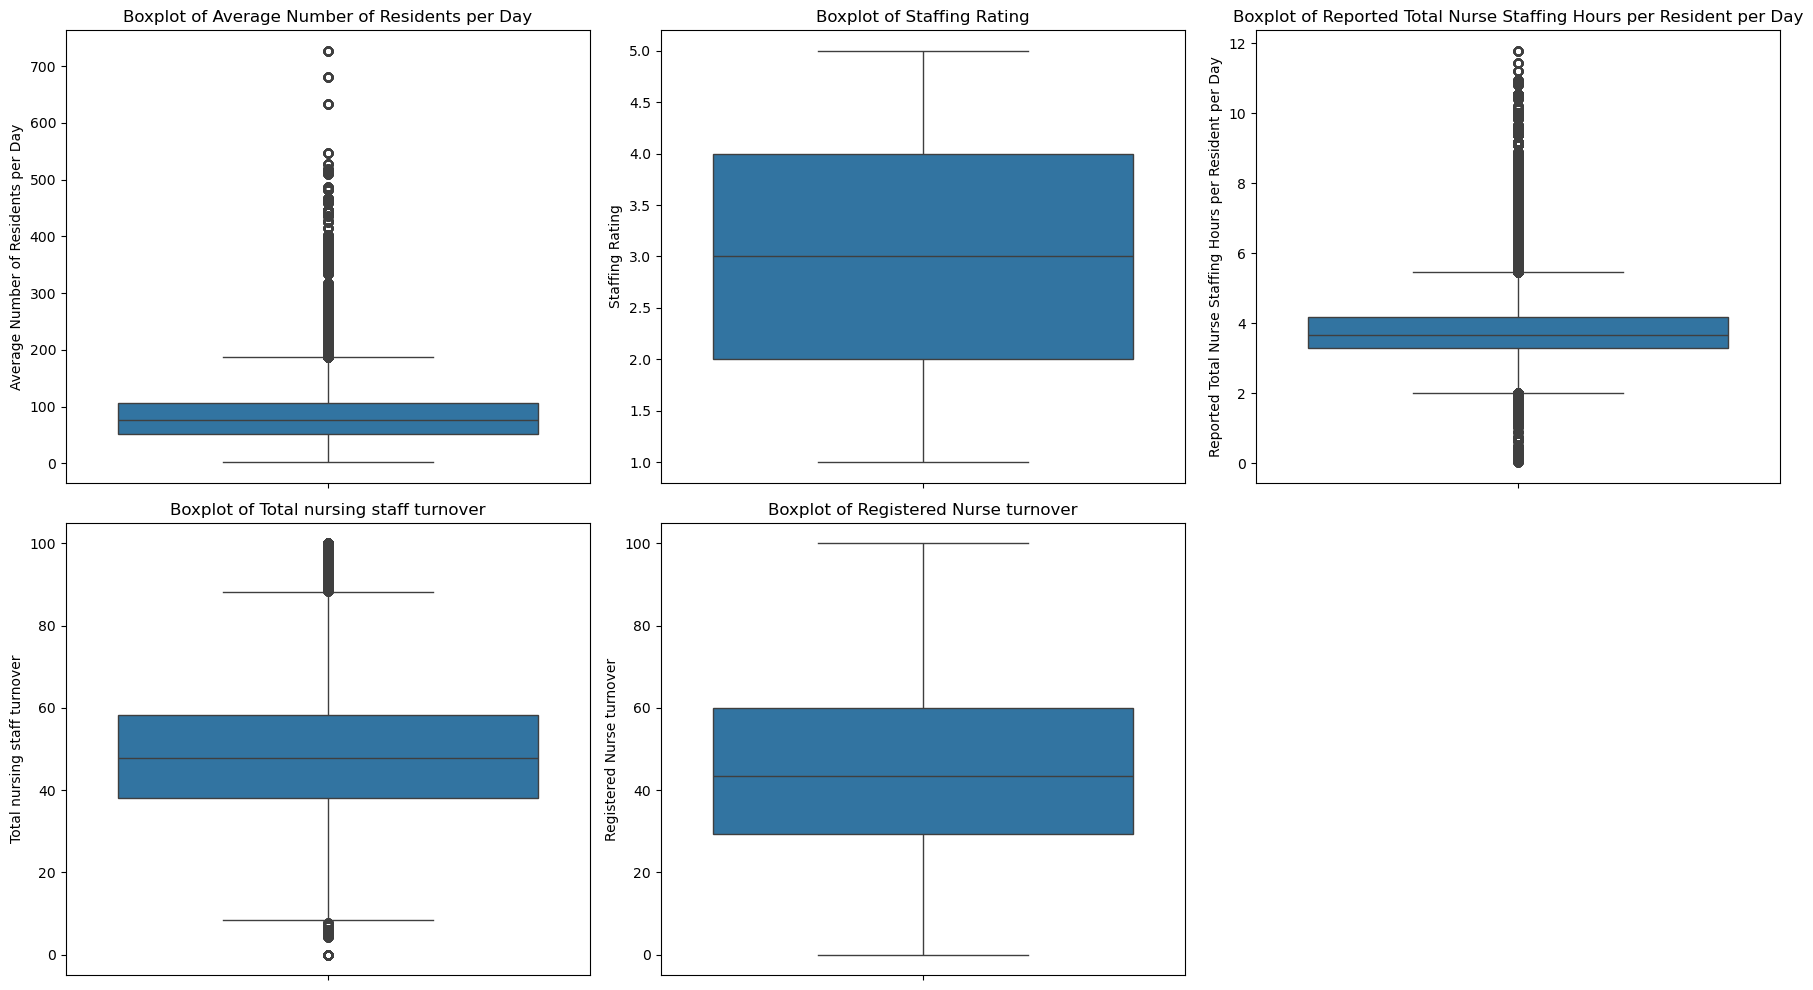

In [11]:
columns = ['Average Number of Residents per Day', 'Staffing Rating', 
           'Reported Total Nurse Staffing Hours per Resident per Day',
           'Total nursing staff turnover','Registered Nurse turnover']

fig, axes = plt.subplots(2, 3, figsize=(18, 10)) 
axes = axes.flatten() 

for i, col in enumerate(columns):
    sns.boxplot(y=merged_df[col], ax=axes[i])  
    axes[i].set_title(f'Boxplot of {col}')

fig.delaxes(axes[5])  

plt.tight_layout()
plt.show()

The most significant outliers appear in `Average Number of Residents per Day` and `Reported Total Nurse Staffing Hours per Resident per Day`,indicating variability in facility size and staffing practices.  Staff Turnover columns show fewer extreme outliers. High turnover (if validated) indicate distress, providing a sales angle for retention initiatives.

Industry Context: High turnover (40–60%) and staffing hours (3.48–6) align with known challenges in nursing homes, such as burnout and regulatory pressures. Outliers may reflect either exceptional cases or data quality issues.

**Next Step**: Validate outlier data (e.g., cross-check with facility records or industry reports). For example, a facility reporting 10+ staffing hours might be a candidate for optimization.

In [12]:
rows_to_drop = merged_df[['Staffing Rating','Reported Total Nurse Staffing Hours per Resident per Day', 
                          'Total nursing staff turnover','Registered Nurse turnover',]].isna().any(axis=1)
print(f"Rows to drop: {rows_to_drop.sum()} out of {len(merged_df)}")
print(f"Percentage lost: {rows_to_drop.mean() * 100:.2f}%")

Rows to drop: 205296 out of 1321502
Percentage lost: 15.54%


In [13]:
#handling the missing data
merged_df = merged_df.dropna(subset=['Staffing Rating','Total nursing staff turnover', 'Registered Nurse turnover','Reported Total Nurse Staffing Hours per Resident per Day'])

print(merged_df.isnull().sum())

PROVNUM                                                     0
PROVNAME                                                    0
STATE                                                       0
CY_Qtr                                                      0
MDScensus                                                   0
Hrs_RN                                                      0
Hrs_RN_ctr                                                  0
Hrs_LPN                                                     0
Hrs_LPN_ctr                                                 0
Hrs_CNA                                                     0
Hrs_CNA_ctr                                                 0
Number of Certified Beds                                    0
Average Number of Residents per Day                         0
Staffing Rating                                             0
Reported Total Nurse Staffing Hours per Resident per Day    0
Total nursing staff turnover                                0
Register

In [14]:
#Filter the state column to include only Alabama (AL)
al_df = merged_df[merged_df['STATE'] == 'AL']
al_df.to_csv('/Users/apple/Desktop/Clipboard_Health/pbj_2024q2_alabama.csv', index=False)

In [15]:
al_df.duplicated().sum()

0

## 6. Feature Engineering

In [16]:
# Aggregate
agg_al_df = al_df.groupby('PROVNUM').agg({
    'Hrs_RN': 'sum', 'Hrs_LPN': 'sum', 'Hrs_CNA': 'sum',
    'Hrs_RN_ctr': 'sum', 'Hrs_LPN_ctr': 'sum', 'Hrs_CNA_ctr': 'sum',
    'Average Number of Residents per Day': 'median',
    'Total nursing staff turnover': 'median',
    'Registered Nurse turnover': 'median',
    'Staffing Rating': 'mean'
}).reset_index()

In [17]:
#print(al_df['PROVNUM'].value_counts().head())

In [18]:
# Hrs_RN = Hrs_RN_emp + Hrs_RN_ctr

DAYS_IN_QUARTER = 91

# Calculate HPRD 
agg_al_df['RN_HPRD'] = agg_al_df['Hrs_RN'] / (agg_al_df['Average Number of Residents per Day'] * DAYS_IN_QUARTER)
agg_al_df['LPN_HPRD'] = agg_al_df['Hrs_LPN']/ (agg_al_df['Average Number of Residents per Day'] * DAYS_IN_QUARTER)
agg_al_df['CNA_HPRD'] = agg_al_df['Hrs_CNA'] / (agg_al_df['Average Number of Residents per Day'] * DAYS_IN_QUARTER)
agg_al_df['Total_HPRD'] = agg_al_df['RN_HPRD'] + agg_al_df['LPN_HPRD'] + agg_al_df['CNA_HPRD']


agg_al_df[['PROVNUM', 'Total_HPRD', 'RN_HPRD', 'LPN_HPRD', 'CNA_HPRD']].head()

,PROVNUM,Total_HPRD,RN_HPRD,LPN_HPRD,CNA_HPRD
0,015009,3.93,0.94,0.42,2.57
1,015015,3.29,0.40,0.81,2.08
2,015016,3.41,0.47,0.57,2.36
3,015019,2.81,0.65,0.45,1.72
4,015023,3.22,0.74,1.12,1.37


In [19]:
# Benchmarks
CMS_TOTAL_HPRD, CMS_RN_HPRD = 3.48, 0.55
agg_al_df['Below_Total_HPRD'] = agg_al_df['Total_HPRD'] < CMS_TOTAL_HPRD
agg_al_df['Below_RN_HPRD'] = agg_al_df['RN_HPRD'] < CMS_RN_HPRD


# Check results
print("Facilities below CMS benchmarks:")
print(agg_al_df[['PROVNUM', 'Total_HPRD', 'RN_HPRD', 'Below_Total_HPRD', 'Below_RN_HPRD']].head())
print("Count below Total HPRD:", agg_al_df['Below_Total_HPRD'].sum())
print("Count below RN HPRD:", agg_al_df['Below_RN_HPRD'].sum())



Facilities below CMS benchmarks:
  PROVNUM  Total_HPRD  RN_HPRD  Below_Total_HPRD  Below_RN_HPRD
0  015009        3.93     0.94             False          False
1  015015        3.29     0.40              True           True
2  015016        3.41     0.47              True           True
3  015019        2.81     0.65              True          False
4  015023        3.22     0.74              True          False
Count below Total HPRD: 131
Count below RN HPRD: 176



####  Staffing Turnover, Contractor Usage Percentage and Staffing Rating

Facilities with turnover rate (>40% total, >20% RN) indicate staffing instability. This presents an opportunities for company to provide temporary contractors,while these facility hairing permanent employee.

To evaluate contractor utilization in nursing homes, our company and its competitors have established a standardized range as a benchmark. For this analysis, I will adopt a 10% contractor usage threshold to identify facilities underutilizing contractors.

In [20]:
# Contractor usage percentage
agg_al_df['Contractor_RN_Pct'] = agg_al_df['Hrs_RN_ctr'] / (agg_al_df['Hrs_RN'] + agg_al_df['Hrs_RN_ctr']) * 100
agg_al_df['Contractor_LPN_Pct'] = agg_al_df['Hrs_LPN_ctr'] / (agg_al_df['Hrs_LPN'] + agg_al_df['Hrs_LPN_ctr']) * 100
agg_al_df['Contractor_CNA_Pct'] = agg_al_df['Hrs_CNA_ctr'] / (agg_al_df['Hrs_CNA'] + agg_al_df['Hrs_CNA_ctr']) * 100
agg_al_df.fillna({'Contractor_RN_Pct': 0, 'Contractor_LPN_Pct': 0, 'Contractor_CNA_Pct': 0}, inplace=True)

# Flag low contractor use (<10%)
agg_al_df['Low_Contractor_Use'] = (agg_al_df['Contractor_RN_Pct'] + agg_al_df['Contractor_LPN_Pct'] + agg_al_df['Contractor_CNA_Pct']) < 10

In [21]:
#Staffing turnover
agg_al_df['High_Total_Turnover'] = agg_al_df['Total nursing staff turnover'] > 40
agg_al_df['High_RN_Turnover'] = agg_al_df['Registered Nurse turnover'] > 20

**CMS Five-Star Quality Rating System** provides a staffing rating for nursing home, ranging from 1 to 5.Facilities with a staffing rating of 1 or 2 indicate below-average or poor staffing levels.  These low ratings may stem from multiple factors,including labor shortages,increased demand for care and challenges in maintaining adequate staffing during weekends. 

By identifying these facilities, our company can target nursing homes where contractor staffing could address immediate gaps and improve operational stability.

In [22]:
agg_al_df['Low_Staffing_Rating'] = agg_al_df['Staffing Rating'].isin([1, 2])

In [23]:

focus_al_df = agg_al_df[
    (agg_al_df['Below_Total_HPRD']) |
    (agg_al_df['Below_RN_HPRD']) |
    (agg_al_df['High_Total_Turnover']) |
    (agg_al_df['High_RN_Turnover']) |
    (agg_al_df['Low_Staffing_Rating']) |
    (agg_al_df['Low_Contractor_Use'])
]
focus_al_df = focus_al_df.merge(al_df[['PROVNUM', 'PROVNAME']].drop_duplicates(), on='PROVNUM', how='left')
focus_al_df.to_csv('/Users/apple/Desktop/Clipboard_Health/clipboard_focus_al_2024q2.csv', index=False)
focus_al_df.head()


,PROVNUM,Hrs_RN,Hrs_LPN,Hrs_CNA,Hrs_RN_ctr,Hrs_LPN_ctr,Hrs_CNA_ctr,Average Number of Residents per Day,Total nursing staff turnover,Registered Nurse turnover,Staffing Rating,RN_HPRD,LPN_HPRD,CNA_HPRD,Total_HPRD,Below_Total_HPRD,Below_RN_HPRD,Contractor_RN_Pct,Contractor_LPN_Pct,Contractor_CNA_Pct,Low_Contractor_Use,High_Total_Turnover,High_RN_Turnover,Low_Staffing_Rating,PROVNAME
0,015009,4578.61,2049.16,12527.48,0.00,0.00,0.00,53.50,36.50,14.30,4.00,0.94,0.42,2.57,3.93,False,False,0.00,0.00,0.00,True,False,False,False,"BURNS NURSING HOME, INC."
1,015015,3214.55,6466.17,16570.34,0.00,0.00,0.00,87.60,30.30,0.00,4.00,0.40,0.81,2.08,3.29,True,True,0.00,0.00,0.00,True,False,False,False,PLANTATION MANOR NURSING HOME
2,015016,5658.10,6866.14,28297.19,0.00,0.00,0.00,131.70,52.10,50.00,3.00,0.47,0.57,2.36,3.41,True,True,0.00,0.00,0.00,True,True,True,False,ATHENS HEALTH AND REHABILITATION LLC
3,015019,5709.87,3953.68,15181.39,0.00,0.00,0.00,97.20,55.60,57.10,3.00,0.65,0.45,1.72,2.81,True,False,0.00,0.00,0.00,True,True,True,False,MERRY WOOD LODGE
4,015023,5767.69,8752.15,10714.12,0.00,5778.89,0.00,86.20,65.80,41.20,2.00,0.74,1.12,1.37,3.22,True,False,0.00,39.77,0.00,False,True,True,True,HATLEY HEALTH CARE INC


## 7. Findings and Visualization

In [24]:
print("Summary of Target Facilities:")
print(f"Total facilities: {len(focus_al_df)}")

Summary of Target Facilities:
Total facilities: 203


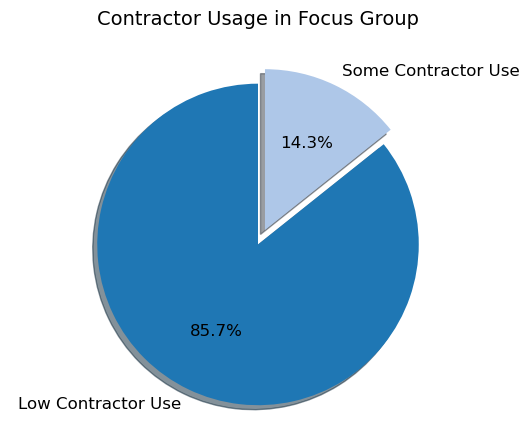

In [25]:
contractor_counts = focus_al_df['Low_Contractor_Use'].value_counts()
labels = ['Low Contractor Use' if val else 'Some Contractor Use' for val in contractor_counts.index]

colors = ['#1f77b4', '#aec7e8'] 
explode = [0.1 if val else 0 for val in contractor_counts.index] 

plt.pie(contractor_counts, labels=labels, autopct='%1.1f%%', colors=colors, explode=explode, 
        startangle=90, shadow=True, textprops={'fontsize': 12})
plt.title("Contractor Usage in Focus Group", fontsize=14, pad=20)
plt.axis('equal') 
plt.show()

Finding: The vast majority of the focus group (85.7%) falls into the "Low Contractor Use" category, suggesting that most facilities have a low level of reliance on contractors (likely <10%, based on my proposed benchmark. especially given the median turnover rates of approximately 50% observed in the outlier detection boxplots section.

**Finding**:
The majority (85.7%) of the focus group falls into the "Low Contractor Use" category, indicating that most facilities rely a low level on contract staff (likely **<10%**, based on the proposed benchmark). This observation is particularly relevant given that **median turnover rates of approximately 50%** were identified in the outlier detection boxplots. The combination of **low contractor** usage and **high turnover** suggests that many facilities may be experiencing staffing instability without sufficient external support.

This finding can support further analysis on the **impact of contractor usage on staff retention** and whether **low contractor reliance correlates with higher turnover rates**.

/var/folders/c2/295g9wz16kx7185znz_1jby00000gn/T/ipykernel_10086/464283963.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(categories.keys()), y=list(categories.values()), palette='Blues_d')


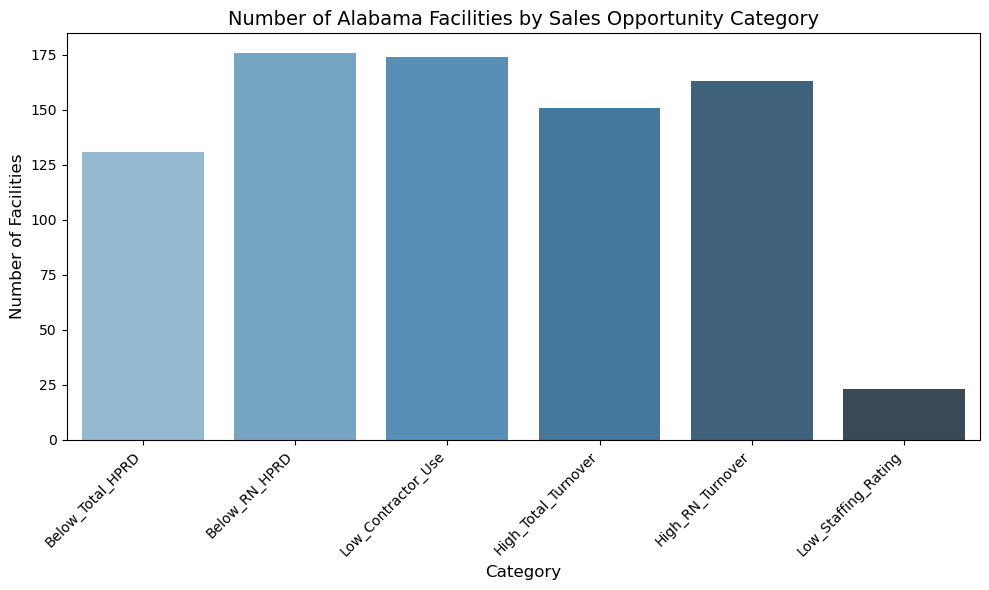

In [26]:
categories = {
    'Below_Total_HPRD': focus_al_df['Below_Total_HPRD'].sum(),
    'Below_RN_HPRD': focus_al_df['Below_RN_HPRD'].sum(),
    'Low_Contractor_Use': focus_al_df['Low_Contractor_Use'].sum(),
    'High_Total_Turnover': focus_al_df['High_Total_Turnover'].sum(),
    'High_RN_Turnover': focus_al_df['High_RN_Turnover'].sum(),
    'Low_Staffing_Rating': focus_al_df['Low_Staffing_Rating'].sum(),
}


plt.figure(figsize=(10, 6))
sns.barplot(x=list(categories.keys()), y=list(categories.values()), palette='Blues_d')
plt.title('Number of Alabama Facilities by Sales Opportunity Category', fontsize=14)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Number of Facilities', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save the chart
plt.savefig('facilities_by_category.png', dpi=300)
plt.show()

As shown in the chart above, the initial analysis provides a foundational understanding of the **203 facilities** in the Focused provider List. The chart highlights significant representation across categories—`Below Total HPRD`, `Below RN HPRD`, `Low Contractor Utilization`, `High Total Turnover`, `High RN Turnover`, and `Low Staffing Rates` with significant overlap between these groups. 

This approach will enable us to **prioritize high-potential sales targets**, tailoring solutions **to address their specific staffing gaps, turnover challenges, and operational inefficiencies,** thereby driving client satisfaction and revenue growth.

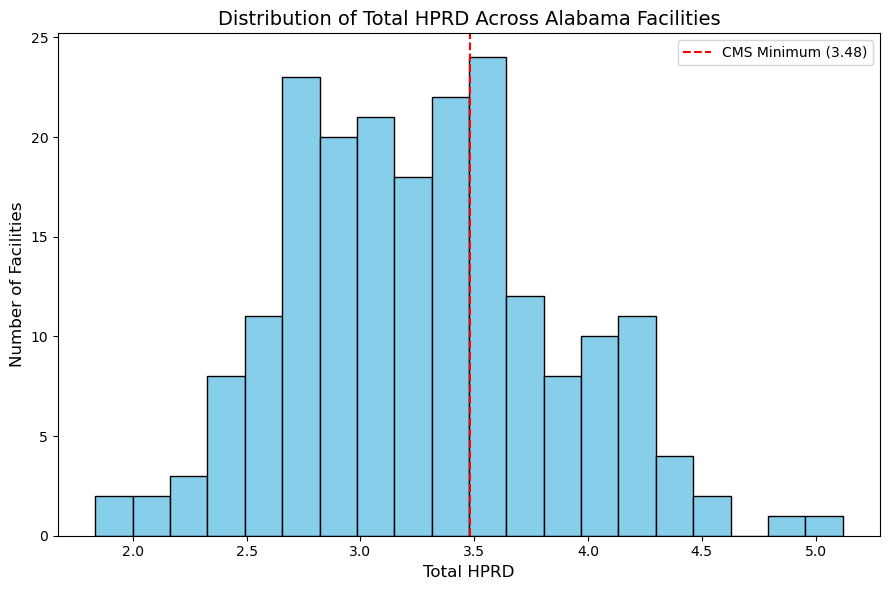

In [27]:
# Histogram of Total HPRD
plt.figure(figsize=(9, 6))
plt.hist(focus_al_df['Total_HPRD'], bins=20, edgecolor='black', color='skyblue')
plt.axvline(CMS_TOTAL_HPRD, color='red', linestyle='--', label='CMS Minimum (3.48)')
plt.title('Distribution of Total HPRD Across Alabama Facilities', fontsize=14)
plt.xlabel('Total HPRD', fontsize=12)
plt.ylabel('Number of Facilities', fontsize=12)
plt.legend()
plt.tight_layout()

# Save the chart
plt.savefig('hprd_distribution.png', dpi=300)
plt.show()

**Finding**  
The graph above shows that the distribution peaks around 3.5 HPRD, with the highest frequency (approximately 22-25 facilities) falling in this range, indicating that this is the most common staffing level among Alabama facilities. A significant number of facilities (2.0-3.0 HPRD range) fall below the 3.48 hour CMS minimum, with decreasing but still present frequency, and **these understaffed facilities (which may overlap with the low contractor utilization and high turnover categories)** are prime targets for sales pitches.

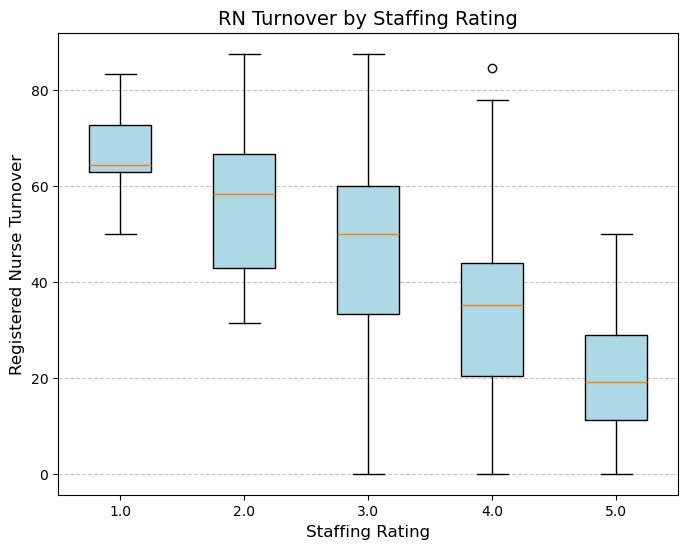

In [28]:
# Compare data: Group 'Registered Nurse turnover' by 'Staffing Rating'
categories = focus_al_df['Staffing Rating'].unique()  
categories.sort()  
data = [focus_al_df.loc[focus_al_df['Staffing Rating'] == cat, 'Registered Nurse turnover'] for cat in categories]
plt.figure(figsize=(8, 6))
plt.boxplot(data, tick_labels=categories, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title("RN Turnover by Staffing Rating", fontsize=14)
plt.xlabel("Staffing Rating", fontsize=12)
plt.ylabel("Registered Nurse Turnover", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Finding**  
Here is a clear **negative correlation** between `Staffing Rating` and `RN Turnover`. Facilities with lower staffing ratings (1-3) tend to have higher RN turnover, indicating greater workforce instability.

- Facilities with a staffing rating of 1 consistently experience high RN turnover, with a median above 60%.
- Higher rated facilities (4-5) exhibit lower turnover rates and reduced variability, implying more stable staffing conditions.
- Staffing ratings 2, 3, and 4 include high upper outliers, indicating that some facilities still experience extreme RN turnover despite their rating.

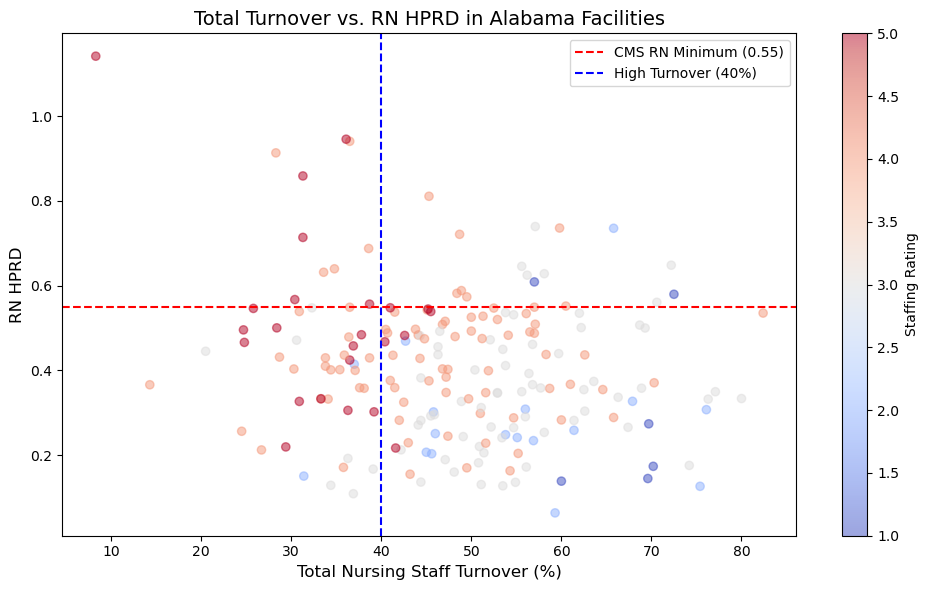

In [29]:
CMS_RN_HPRD = 0.55
plt.figure(figsize=(10, 6))
plt.scatter(focus_al_df['Total nursing staff turnover'], 
            focus_al_df['RN_HPRD'], 
            alpha=0.5, c=focus_al_df['Staffing Rating'], cmap='coolwarm')
plt.axhline(CMS_RN_HPRD, color='red', linestyle='--', label='CMS RN Minimum (0.55)')
plt.axvline(40, color='blue', linestyle='--', label='High Turnover (40%)')
plt.title('Total Turnover vs. RN HPRD in Alabama Facilities', fontsize=14)
plt.xlabel('Total Nursing Staff Turnover (%)', fontsize=12)
plt.ylabel('RN HPRD', fontsize=12)
plt.colorbar(label='Staffing Rating')
plt.legend()
plt.tight_layout()
plt.savefig('turnover_vs_rn_hprd.png', dpi=300)
plt.show()

- The red dashed line (CMS RN Minimum = 0.55 HPRD) represents the minimum recommended Registered Nurse (RN) hours per resident per day.
- The blue dashed line (High Turnover = 40%) marks a threshold for high total nursing staff turnover.

**Finding**:  
Facilities in the bottom-right quadrant (high turnover, low RN HPRD) are most vulnerable. These facilities fail to meet the CMS RN minimum standard while also experiencing high staff turnover, indicating potential staffing gaps.

## 8. Recommendations

The findings highlighted a key group of facilities in Alabama’s 203 nursing facilities that face multiple challenges—low contractor utilization, high staff turnover, and insufficient staffing time and these facilities represent high-potential sales targets. To capitalize on these opportunities and align with our goal of increasing sales performance, the sales team should prioritize the following strategic actions:


1. **Target facilities with low RN HPRD  and minimal Contractor utilization**
   - Focus on facilities with RN hours per resident day (HPRD) below the CMS minimum standard of 0.55 hours and low contractor utilization (<10%). As shown in the scatter plot and pie chart, these facilities are likely understaffed and represent an immediate opportunity to pitch temporary staffing services.

2. **Address High Turnover with Flexible Staffing.**
   - Target facilities with turnover rates exceeding 40%, implementing flexible staffing plans such as on-demand staffing resources. This approach will reduce the impact of high turnover and support operational efficiency.

3. **Focus on Low Staffing Rating Facilities**
   - Focus on facilities with staffing ratings below 3.0. Offer targeted quality improvement services.Generate additional sales opportunities.


**Further analysis for enhanced insights:**


- **Cross-analyzing categories**: identify facilities that fall into multiple high-risk groups such as those with low contractor utilization and high turnover, to pinpoint the most urgent sales targets.

- **Segmenting facilities by priority** Categorize facilities based on the severity and combination of issues (low RN HPRD, high turnover, low ratings) to optimize resource allocation and sales focus.
  
- **Explore Additional Drivers**: such as if facility size or location (rural vs. urban) impacts the relationship between RN turnover and staffing rating.

